<a href="https://colab.research.google.com/github/andrewwhite5/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_114_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
import pandas as pd

import random
dir(random)  # Reminding ourselves what we can do here

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [66]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])  # This is a tuple, meaning that the values inside are immutable

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [67]:
example_user.time_on_site = 30  # Just an example to help me understand tuples -- Won't allow me to reset the attribute from 12 (see above) to 30

AttributeError: ignored

In [73]:
import numpy as np

np.random.normal(10,2)

7.8909238653045595

In [75]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

for _ in range(250):
  # Desktop users
  # time_on_site = random.uniform(10, 600)  # Generates random float between 10 and 600
  time_on_site = np.random.normal(9.4 * 60, 3 * 60)  # Changed to np.random.normal because it will simulate normal distribution
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  # time_on_site = random.uniform(5, 300)
  time_on_site = np.random.normal(7.5 * 60, 2.5 * 60)  # Changed to 7.5 minutes (and 9.4 for desktop) by checking means on a website -- stdev is just as a guess
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
users[:10]

[User(purchased=True, time_on_site=279.2193990815271, mobile=True),
 User(purchased=True, time_on_site=769.6143743975638, mobile=False),
 User(purchased=True, time_on_site=380.38318209731545, mobile=True),
 User(purchased=True, time_on_site=475.2835151014971, mobile=True),
 User(purchased=True, time_on_site=452.75605572877197, mobile=True),
 User(purchased=False, time_on_site=471.39441104037917, mobile=True),
 User(purchased=False, time_on_site=449.34734004102785, mobile=True),
 User(purchased=False, time_on_site=474.2111777974556, mobile=True),
 User(purchased=True, time_on_site=605.4754263646258, mobile=True),
 User(purchased=True, time_on_site=657.7325099795655, mobile=False)]

In [76]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

,purchased,time_on_site,mobile
0,True,279.219399,True
1,True,769.614374,False
2,True,380.383182,True
3,True,475.283515,True
4,True,452.756056,True


In [88]:
user_data[user_data['time_on_site'] < 0.0]  # Only one value ended up being below 0 seconds (-11 seconds) -- In real life, you'd probably just drop it

,purchased,time_on_site,mobile,time_on_site_min


In [89]:
user_data.loc[user_data['time_on_site'] < 0.0, 'time_on_site'] = 0.0  # This sets the value to 0 (before, it was below 0)
user_data[user_data['time_on_site'] < 0.0]  # And now we check if it worked (that there are no longer values below 0 -- below should show no rows)

,purchased,time_on_site,mobile,time_on_site_min


In [90]:
user_data['time_on_site_min'] = user_data['time_on_site'] / 60
user_data.head()

,purchased,time_on_site,mobile,time_on_site_min
0,True,279.219399,True,4.653657
1,True,769.614374,False,12.826906
2,True,380.383182,True,6.339720
3,True,475.283515,True,7.921392
4,True,452.756056,True,7.545934


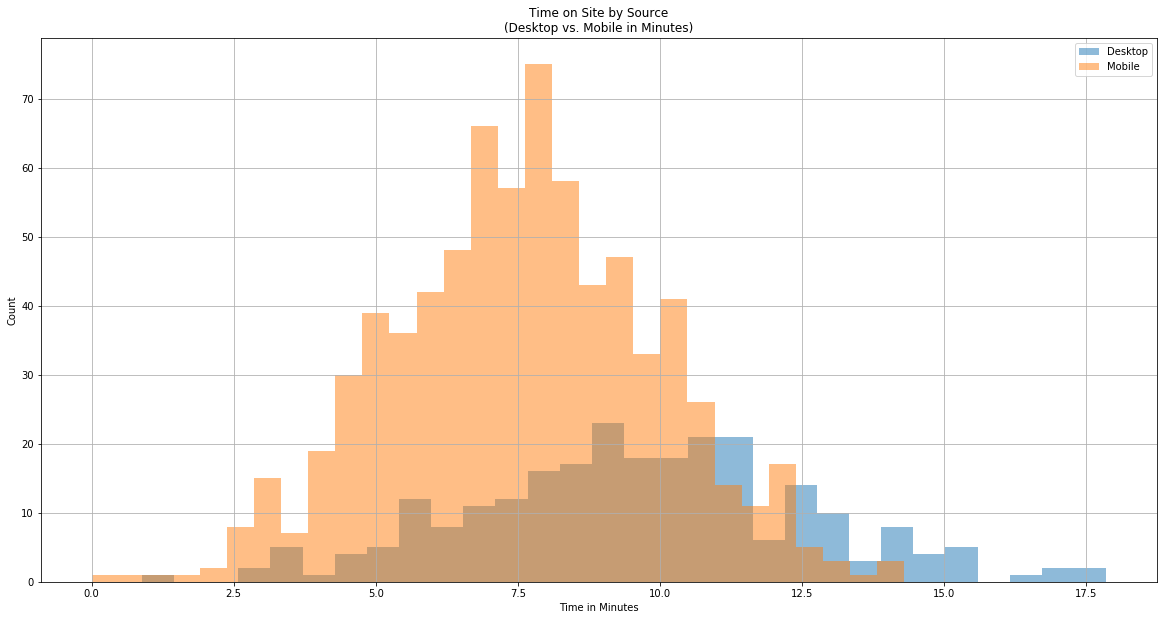

In [91]:
user_data.groupby('mobile').time_on_site_min.hist(bins=30, alpha=0.5, figsize=(20,10))
plt.title('Time on Site by Source\n(Desktop vs. Mobile in Minutes)')
plt.xlabel('Time in Minutes')
plt.ylabel('Count')
plt.legend(['Desktop','Mobile']);

In [92]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,0.0,53.14881637708311,55.682773151392496,63.74723956287471,92.38824764538236,140.58492741552033,141.09402930693187,143.49402324695984,144.6942454554519,153.60716368321613,156.96890596672046,158.09686186508225,162.4317886562925,164.42091535039123,166.55984804382535,170.97338532554238,177.10782042679062,177.27996360158755,177.51769963322891,177.56867646230745,178.07921026508666,179.76304384801222,180.34380953401148,181.4368148483972,182.33684940788623,183.66181844523067,187.40132721144107,188.43794362525762,190.34572613158656,191.1482335118468,191.49240587903267,197.8598402448873,201.5339199869776,202.95793649109262,204.37462867775025,204.68673547904973,205.4910943611008,206.0614189321848,210.5542641376319,212.3731859570904,...,769.5808259971799,769.6143743975638,780.6440413202622,781.7608416598217,782.5416658340288,783.0524390059907,787.1836230354907,788.4873684312528,790.4891721587059,792.517821053223,793.1849154299694,802.1179261948839,802.3130007673137,829.0973584718502,829.8605721382786,838.3341099459528,838.5049006827048,841.3533331664444,844.4934495725423,847.8026084487385,849.1770407474296,857.4945117840643,857.5864443897667,859.7976855752754,862.1245582364477,867.2007651647152,871.1109625747632,890.5691792473945,895.2339755506978,895.4926551168031,904.2907524126003,908.0822719235939,910.1073722087281,911.1214359387579,922.0201755051376,989.0378802377546,1006.1540576221993,1008.9123168153228,1039.4535344911928,1070.7786154128742
purchased,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,0,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,0,1,0,...,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0
True,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,...,0,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,0,1,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,0,1,1,1,1,1


In [94]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site_min'], 5)  # 5 equal-sized bins
pd.crosstab(time_bins, user_data['purchased'])

purchased,False,True
time_on_site_min,,
"(-0.0178, 3.569]",25,15
"(3.569, 7.139]",168,158
"(7.139, 10.708]",197,278
"(10.708, 14.277]",57,83
"(14.277, 17.846]",6,13


In [96]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(time_bins, user_data['purchased'], normalize='columns')

purchased,False,True
time_on_site_min,,
"(-0.0178, 3.569]",0.055188,0.027422
"(3.569, 7.139]",0.370861,0.288848
"(7.139, 10.708]",0.434879,0.508227
"(10.708, 14.277]",0.125828,0.151737
"(14.277, 17.846]",0.013245,0.023766


In [97]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.532,0.426667
True,0.468,0.573333


In [98]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?
pd.crosstab(time_bins, [user_data['purchased'], user_data['mobile']], normalize='columns')

purchased            False               True           
mobile               False     True      False     True 
time_on_site_min                                        
(-0.0178, 3.569]  0.037594  0.062500  0.000000  0.034884
(3.569, 7.139]    0.233083  0.428125  0.119658  0.334884
(7.139, 10.708]   0.436090  0.434375  0.444444  0.525581
(10.708, 14.277]  0.248120  0.075000  0.333333  0.102326
(14.277, 17.846]  0.045113  0.000000  0.102564  0.002326

In [0]:
df = pd.DataFrame({'a': np.arange(1e6),
                  'b': 2 * np.arange(1e6)})
print(df.shape)
df.head()

(1000000, 2)


,a,b
0,0.0,0.0
1,1.0,2.0
2,2.0,4.0
3,3.0,6.0
4,4.0,8.0


In [0]:
%timeit df['c'] = df['a']**2

100 loops, best of 3: 16.3 ms per loop


In [0]:
%timeit df['c2'] = df['a'].apply(lambda x: x**2)

1 loop, best of 3: 449 ms per loop


In [0]:
%%time
df = pd.read_csv['co_denver_2019_02_25.csv']
df.head()

TypeError: ignored

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [112]:
col_headers = ['ID', 'Age', 'Weight', 'Exercise Minutes']

df = pd.read_csv('https://raw.githubusercontent.com/andrewwhite5/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv', 
                 header=None, names=col_headers, skiprows=1)
print(df.shape)
df.head(10)

(1200, 4)


,ID,Age,Weight,Exercise Minutes
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182
5,5,58,103,165
6,6,55,161,107
7,7,21,188,37
8,8,55,216,79
9,9,50,127,267


In [0]:
df.isna().sum()

ID               0
Age              0
Weight           0
Exercise Time    0
dtype: int64

In [136]:
df.describe()

,ID,Age,Weight,Exercise Minutes
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,599.500000,48.396667,153.540833,134.910833
std,346.554469,18.166802,35.132182,85.548895
min,0.000000,18.000000,100.000000,0.000000
25%,299.750000,33.000000,125.000000,65.000000
50%,599.500000,48.000000,149.000000,122.000000
75%,899.250000,64.000000,180.250000,206.000000
max,1199.000000,80.000000,246.000000,300.000000


In [113]:
exercise_bins = pd.cut(df['Exercise Minutes'], 5)  # 5 bins of exercise time to compare with weight
pd.crosstab(exercise_bins, df['Weight'], normalize='columns')

Weight,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,233,234,236,237,238,239,240,241,242,244,246
Exercise Minutes,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(-0.3, 60.0]",0.333333,0.0,0.076923,0.125,0.222222,0.3,0.125,0.000000,0.052632,0.153846,0.142857,0.2,0.250,0.20,0.090909,0.00,0.200000,0.214286,0.166667,0.181818,0.153846,0.000000,0.076923,0.111111,0.176471,0.055556,0.117647,0.333333,0.058824,0.071429,0.250,0.142857,0.000000,0.222222,0.000000,0.076923,0.133333,0.052632,0.000000,0.230769,...,0.444444,0.416667,0.6,0.75,0.5,0.444444,0.666667,0.500,0.5,0.428571,0.5,0.444444,0.5,0.666667,0.666667,0.833333,0.666667,0.0,0.0,0.666667,0.0,1.0,0.5,1.0,1.0,1.0,1.0,0.666667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"(60.0, 120.0]",0.066667,0.1,0.153846,0.250,0.222222,0.0,0.250,0.181818,0.105263,0.307692,0.285714,0.0,0.125,0.15,0.181818,0.00,0.266667,0.142857,0.166667,0.181818,0.000000,0.444444,0.384615,0.333333,0.235294,0.111111,0.176471,0.000000,0.176471,0.285714,0.125,0.214286,0.222222,0.111111,0.181818,0.307692,0.266667,0.157895,0.153846,0.230769,...,0.444444,0.583333,0.4,0.25,0.5,0.555556,0.333333,0.375,0.5,0.571429,0.5,0.555556,0.5,0.333333,0.333333,0.166667,0.333333,1.0,1.0,0.333333,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(120.0, 180.0]",0.066667,0.2,0.230769,0.250,0.111111,0.2,0.250,0.363636,0.315789,0.230769,0.357143,0.3,0.250,0.10,0.272727,0.25,0.133333,0.000000,0.166667,0.181818,0.230769,0.111111,0.000000,0.111111,0.352941,0.277778,0.235294,0.066667,0.058824,0.071429,0.000,0.142857,0.111111,0.111111,0.181818,0.230769,0.133333,0.263158,0.384615,0.307692,...,0.111111,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.125,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(180.0, 240.0]",0.266667,0.5,0.230769,0.000,0.222222,0.1,0.125,0.272727,0.210526,0.307692,0.142857,0.2,0.125,0.25,0.090909,0.25,0.200000,0.214286,0.333333,0.181818,0.153846,0.333333,0.153846,0.222222,0.117647,0.166667,0.235294,0.066667,0.294118,0.357143,0.125,0.285714,0.222222,0.111111,0.181818,0.153846,0.333333,0.210526,0.230769,0.153846,...,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(240.0, 300.0]",0.266667,0.2,0.307692,0.375,0.222222,0.4,0.250,0.181818,0.315789,0.000000,0.071429,0.3,0.250,0.30,0.363636,0.50,0.200000,0.428571,0.166667,0.272727,0.461538,0.111111,0.384615,0.222222,0.117647,0.388889,0.235294,0.533333,0.411765,0.214286,0.500,0.214286,0.444444,0.444444,0.454545,0.230769,0.133333,0.315789,0.230769,0.076923,...,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
weight_bins = pd.cut(df['Weight'], 5)
pd.crosstab(weight_bins, df['Exercise Minutes'], normalize='columns')

Exercise Minutes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,30,31,32,33,34,35,36,37,38,39,40,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,296,297,298,299,300
Weight,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(99.854, 129.2]",0.0,0.00,0.142857,0.333333,0.2,0.000000,0.000000,0.0,0.333333,0.000000,0.333333,0.0,0.0,0.166667,0.333333,0.2,0.4,0.181818,0.166667,0.0,0.2,0.250000,0.000000,0.5,0.4,0.333333,0.0,0.166667,0.166667,0.142857,0.000,0.000000,0.166667,0.333333,0.285714,0.428571,0.4,0.0,0.0,0.00,...,0.333333,1.0,0.5,0.25,0.5,0.8,0.666667,0.75,1.0,0.0,0.5,1.0,0.0,1.0,0.0,0.0,0.6,0.333333,0.333333,0.666667,0.666667,0.0,0.75,0.0,0.666667,0.5,1.0,0.8,0.666667,0.857143,0.0,0.666667,0.0,0.666667,1.0,1.0,0.5,0.5,1.0,0.4
"(129.2, 158.4]",0.0,0.25,0.000000,0.000000,0.0,0.142857,0.333333,1.0,0.000000,0.333333,0.000000,0.0,0.0,0.166667,0.000000,0.4,0.0,0.181818,0.166667,0.6,0.2,0.250000,0.142857,0.0,0.2,0.000000,0.5,0.166667,0.166667,0.142857,0.250,0.666667,0.000000,0.000000,0.285714,0.000000,0.0,0.0,0.0,0.25,...,0.666667,0.0,0.5,0.75,0.5,0.2,0.333333,0.25,0.0,1.0,0.5,0.0,0.0,0.0,1.0,1.0,0.4,0.666667,0.666667,0.333333,0.333333,1.0,0.25,1.0,0.333333,0.5,0.0,0.2,0.333333,0.142857,1.0,0.333333,1.0,0.333333,0.0,0.0,0.5,0.5,0.0,0.6
"(158.4, 187.6]",0.5,0.00,0.285714,0.166667,0.4,0.285714,0.000000,0.0,0.333333,0.000000,0.000000,0.0,1.0,0.000000,0.333333,0.2,0.4,0.272727,0.333333,0.0,0.2,0.166667,0.142857,0.0,0.2,0.000000,0.0,0.000000,0.000000,0.428571,0.375,0.333333,0.500000,0.166667,0.428571,0.142857,0.0,0.0,1.0,0.50,...,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
"(187.6, 216.8]",0.5,0.50,0.285714,0.000000,0.4,0.142857,0.333333,0.0,0.000000,0.666667,0.333333,0.0,0.0,0.500000,0.333333,0.2,0.2,0.272727,0.166667,0.2,0.4,0.250000,0.571429,0.0,0.2,0.333333,0.0,0.333333,0.333333,0.142857,0.375,0.000000,0.166667,0.166667,0.000000,0.142857,0.6,1.0,0.0,0.25,...,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
"(216.8, 246.0]",0.0,0.25,0.285714,0.500000,0.0,0.428571,0.333333,0.0,0.333333,0.000000,0.333333,1.0,0.0,0.166667,0.000000,0.0,0.0,0.090909,0.166667,0.2,0.0,0.083333,0.142857,0.5,0.0,0.333333,0.5,0.333333,0.333333,0.142857,0.000,0.000000,0.166667,0.333333,0.000000,0.285714,0.0,0.0,0.0,0.00,...,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
pd.crosstab([weight_bins, exercise_bins], df['Age'], normalize='columns')

Age                                 18        19  ...        79        80
Weight          Exercise Minutes                  ...                    
(99.854, 129.2] (-0.3, 60.0]      0.00  0.000000  ...  0.266667  0.105263
                (60.0, 120.0]     0.10  0.043478  ...  0.066667  0.000000
                (120.0, 180.0]    0.05  0.000000  ...  0.000000  0.000000
                (180.0, 240.0]    0.10  0.086957  ...  0.000000  0.000000
                (240.0, 300.0]    0.10  0.043478  ...  0.000000  0.000000
(129.2, 158.4]  (-0.3, 60.0]      0.05  0.043478  ...  0.000000  0.157895
                (60.0, 120.0]     0.10  0.043478  ...  0.200000  0.000000
                (120.0, 180.0]    0.10  0.086957  ...  0.000000  0.000000
                (180.0, 240.0]    0.15  0.086957  ...  0.000000  0.000000
                (240.0, 300.0]    0.00  0.043478  ...  0.000000  0.000000
(158.4, 187.6]  (-0.3, 60.0]      0.00  0.000000  ...  0.133333  0.052632
                (60.0, 120.0]     0.10  0.173913  ...  0.066667  0.210526
                (120.0, 180.0]    0.00  0.043478  ...  0.000000  0.000000
                (180.0, 240.0]    0.05  0.043478  ...  0.000000  0.000000
                (240.0, 300.0]    0.00  0.000000  ...  0.000000  0.000000
(187.6, 216.8]  (-0.3, 60.0]      0.05  0.130435  ...  0.133333  0.210526
                (60.0, 120.0]     0.00  0.086957  ...  0.000000  0.000000
                (120.0, 180.0]    0.05  0.000000  ...  0.000000  0.000000
                (180.0, 240.0]    0.00  0.000000  ...  0.000000  0.000000
(216.8, 246.0]  (-0.3, 60.0]      0.00  0.043478  ...  0.066667  0.210526
                (60.0, 120.0]     0.00  0.000000  ...  0.066667  0.052632

[21 rows x 63 columns]

In [146]:
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

train, test = train_test_split(df.copy(), random_state=0)
train.shape, test.shape

((900, 4), (300, 4))

In [0]:
features = ['Weight']
target = 'Exercise Minutes'

def error():
    y_true = train[target]
    y_pred = model.predict(train[features])
    train_error = mean_absolute_error(y_true, y_pred)

    y_true = test[target]
    y_pred = model.predict(test[features])
    test_error = mean_absolute_error(y_true, y_pred)

    print('Train Error: ', round(train_error))
    print('Test Error: ', round(test_error))

In [155]:
model = LinearRegression()
model.fit(train[features], train[target])
error()

Train Error:  62.0
Test Error:  62.0


In [156]:
model = LinearRegression()

weight = range(300)

model.fit(train[features], train[target])
predictions = model.predict(weight)
train.plot.scatter(x='Exercise Minutes', y='Weight', s=50)
plt.plot(Weight, predictions)
plt.title('Linear Regression');

ValueError: ignored

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?

    *  Age, Weight, and Exercise Minutes are all ints

2.  What are the relationships between the variables?

    *  

3.  Which relationships are "real", and which spurious?

    *  


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)